<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

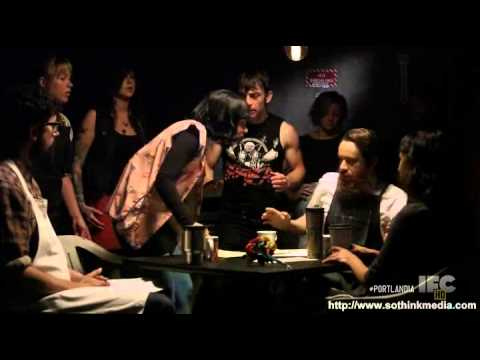

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\eneph\\DS9\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Start here 
import spacy
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import re
from spacy.tokenizer import Tokenizer

In [8]:
nlp = spacy.load("en_core_web_lg")

In [53]:
#not used in final implementation (redundant)
stop_words = nlp.Defaults.stop_words.union(['I', 'i', 'it', "it's", 'it.', 'the', 'this', ' '])

In [22]:
# also redundant
tokenizer = Tokenizer(nlp.vocab)

def tokenize(document):
    tokens = []

    for doc in tokenizer.pipe(document, batch_size=500):

        doc_tokens = []

        for token in doc: 
            if token.text.lower() not in stop_words:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    return tokens

In [43]:
#test code
tokened = tokenize(shops['star_rating'])
tokened[5][0]

'4.0'

In [26]:
# test code that is now useless (redundant)
def settostring(set):
    new_strings = []
    for line in set:
        new_strings.append(repr(line))
    return new_strings

In [28]:
#test code revals that tokenizing a string then recasting to string is a painful and
#ultimately useless process
token_strings = settostring(tokened)
token_strings[:5]

["['5.0', 'star', 'rating']",
 "['4.0', 'star', 'rating']",
 "['4.0', 'star', 'rating']",
 "['2.0', 'star', 'rating']",
 "['4.0', 'star', 'rating']"]

In [32]:
#this also returns data in a format useless for lemmatization (redundant)
token_string = repr(tokened)
token_string[:5]

"[['5."

In [62]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        #force in a ' ' as function returns a ' ' value
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON') and (token.lemma_ != ' '):
            lemmas.append(token.lemma_)
    
    return lemmas


In [63]:
#apply lemmas function and check results
shops['lemmas'] = shops['star_rating'].apply(get_lemmas)
shops['lemmas'][:5]

0    [5.0, star, rating]
1    [4.0, star, rating]
2    [4.0, star, rating]
3    [2.0, star, rating]
4    [4.0, star, rating]
Name: lemmas, dtype: object

In [64]:
shops['lemmas'][0][0]

'5.0'

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [47]:
from collections import Counter 

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [66]:
len(wc_top20)

7

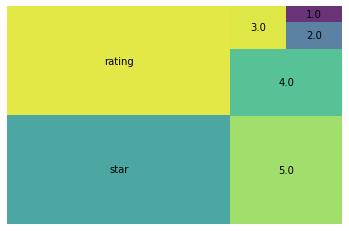

In [65]:
#view counts for star_rating, majority scores are 5 and 4
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [67]:
#get lemmas from the full_review_column
shops['l_review'] = shops['full_review_text'].apply(get_lemmas)
shops['l_review'][:5]

0    [11/25/2016, 1, check, love, love, love, atmos...
1    [12/2/2016, list, Date, Night, Austin, Ambianc...
2    [11/30/2016, 1, check, list, Brunch, Spots, lo...
3    [11/25/2016, cool, decor, good, drink, nice, s...
4    [12/3/2016, 1, check, locate, Northcross, mall...
Name: l_review, dtype: object

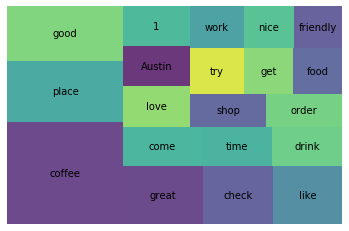

In [68]:
wc = count(shops['l_review'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [71]:
wc[wc['word'] == 'bad']

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1245,bad,415,472,136.0,0.001275,0.424272,0.054491


In [72]:
wc[wc['word'] == 'good']

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
163,good,3588,5391,3.0,0.014563,0.058113,0.471113


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

